# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [14]:
data.drop(['CustomerID'],axis=1,inplace=True)

In [17]:
data.replace({'Gender':{'Male':1, 'Female':0}}, inplace=True)

In [18]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


In [21]:
X = data.iloc[:, 0:4]

In [22]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [23]:
from sklearn.cluster import KMeans
k_means = KMeans()
k_means.fit(X)

KMeans()

# Elbow Method to find n_clusters:

In [24]:
wcss = []
for i in range(1,11):
    k_means = KMeans(i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

C:\Users\Sameer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
wcss

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75427.71182424153,
 58348.64136331505,
 51167.19736842105,
 44359.634641148325,
 41107.442045454554,
 37994.28917748918]

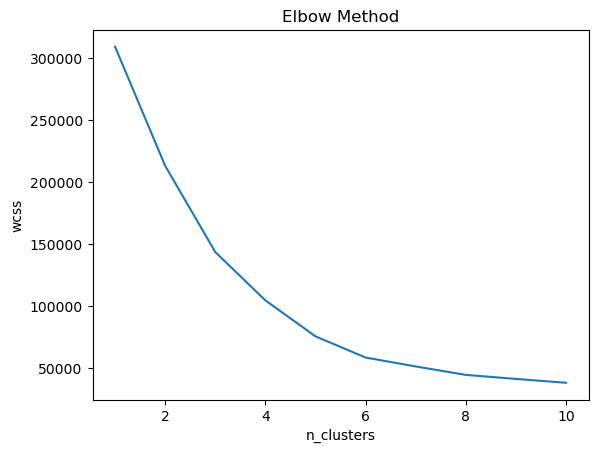

In [37]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.show()

# Train model using n_clusters = 5

In [28]:
k_means = KMeans(n_clusters=5, random_state=42)
y_means= k_means.fit_predict(X)

In [48]:
y_means

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

# Scatter Plot

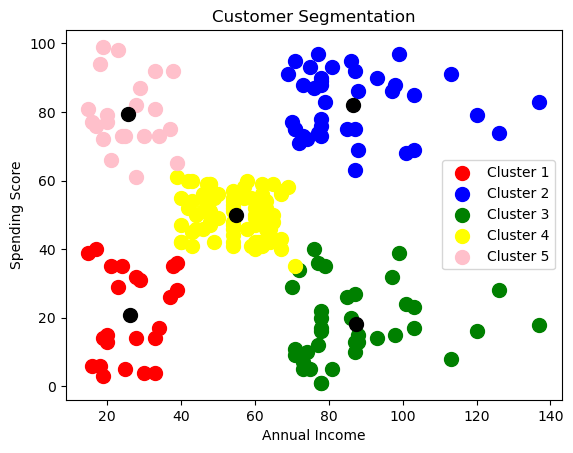

In [55]:
plt.scatter(X.iloc[y_means==0,2], X.iloc[y_means==0,3], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_means==1,2], X.iloc[y_means==1,3], s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_means==2,2], X.iloc[y_means==2,3], s=100, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_means==3,2], X.iloc[y_means==3,3], s=100, c='yellow', label='Cluster 4')
plt.scatter(X.iloc[y_means==4,2], X.iloc[y_means==4,3], s=100, c='pink', label='Cluster 5')

plt.scatter(k_means.cluster_centers_[:,2], k_means.cluster_centers_[:,3], s=100, c='black')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [43]:
import joblib
joblib.dump(k_means,'customer_segmentation')

['customer_segmentation']

In [49]:
model = joblib.load('customer_segmentation')

In [58]:
model.predict([[0,40,20,100]])

C:\Users\Sameer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

# GUI

In [59]:
from tkinter import *
import joblib

In [61]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    
    model = joblib.load('customer_segmentation')
    result=model.predict([[p1,p2,p3,p4]])
    print("This Customer belongs to cluster no: ", result[0])
    
    if result[0] == 0:
        Label(master, text="Customers with medium annual income and medium annual spend").grid(row=31)
    elif result[0]==1:
        Label(master, text="Customers with high annual income but low annual spend").grid(row=31)
    elif result[0]==2:
        Label(master, text="Customers with low annual income and low annual spend").grid(row=31)
    elif result[0]==3:
        Label(master, text="Customers low annual income but high annual spend").grid(row=31)
    elif result[0]==4:
        Label(master, text="Customers with high annual income and high annual spend").grid(row=31)

master = Tk()
master.title("Customer Segmentation Using Machine Learning")


label = Label(master, text = "Customer Segmentation Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master,text="Male/Female [1/0]").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master,text="Annual Income (k$)").grid(row=3)
Label(master,text="Spending Score (1-100)").grid(row=4)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\Sameer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


This Customer belongs to cluster no:  4
